<a href="https://colab.research.google.com/github/jyun0618/EPOCH_FinalProject/blob/main/modeling/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/EPOCH/Final Project/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/EPOCH/Final Project/data/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/EPOCH/Final Project/data/sample_submission.csv') # 그냥 깡통 df

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
# 데이터 확인
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


# 2. EDA

## 2-1. 결측치 확인

In [ ]:
train.isnull().sum()
train.isnull().sum()/len(train)

,0
index,0.000000
gender,0.000000
car,0.000000
reality,0.000000
child_num,0.000000
income_total,0.000000
income_type,0.000000
edu_type,0.000000
family_type,0.000000
house_type,0.000000


`occyp_type` 직업 유형: 결측치 8171개(약 30%)

In [ ]:
# 요소별 데이터 개수
train['occyp_type'].value_counts()

,count
occyp_type,
Laborers,4512
Core staff,2646
Sales staff,2539
Managers,2167
Drivers,1575
High skill tech staff,1040
Accountants,902
Medicine staff,864
Cooking staff,457


## 2-2. 기초통계

In [ ]:
# train.describe().T

# select_dtypes(exclude=['object']) 으로 object 데이터타입 컬럼 제외
train_stat = pd.DataFrame({
    'min': train.select_dtypes(exclude=['object']).min(),
    'median': train.select_dtypes(exclude=['object']).median(),
    'max': train.select_dtypes(exclude=['object']).max(),
    'mean' : train.select_dtypes(exclude=['object']).mean(),
    'std': train.select_dtypes(exclude=['object']).std(),
})
train_stat

,min,median,max,mean,std
index,0.0,13228.0,26456.0,13228.000000,7637.622372
child_num,0.0,0.0,19.0,0.428658,0.747326
income_total,27000.0,157500.0,1575000.0,187306.524493,101878.367995
DAYS_BIRTH,-25152.0,-15547.0,-7705.0,-15958.053899,4201.589022
DAYS_EMPLOYED,-15713.0,-1539.0,365243.0,59068.750728,137475.427503
FLAG_MOBIL,1.0,1.0,1.0,1.000000,0.000000
work_phone,0.0,0.0,1.0,0.224742,0.417420
phone,0.0,0.0,1.0,0.294251,0.455714
email,0.0,0.0,1.0,0.091280,0.288013
family_size,1.0,2.0,20.0,2.196848,0.916717


# 3. 데이터 전처리

In [ ]:
# unique 데이터 개수 확인
unique_len = train.apply(lambda x : len(x.unique()))
unique_len

,0
index,26457
gender,2
car,2
reality,2
child_num,9
income_total,249
income_type,5
edu_type,5
family_type,5
house_type,6


데이터 타입 = `object` 컬럼들 unique 요소 출력

In [ ]:
train['income_type'].unique()
train['edu_type'].unique()
train['family_type'].unique()
train['house_type'].unique()
train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

각 요소별 데이터 개수 출력

In [ ]:
train['income_type'].value_counts()
train['edu_type'].value_counts()
train['family_type'].value_counts()
train['house_type'].value_counts()
train['occyp_type'].value_counts()

,count
occyp_type,
Laborers,4512
Core staff,2646
Sales staff,2539
Managers,2167
Drivers,1575
High skill tech staff,1040
Accountants,902
Medicine staff,864
Cooking staff,457


## 3-1. 음수 데이터 양수화

In [ ]:
# 음수 데이터 확인(이것도 내가 한거)
# train_numeric = train.select_dtypes(exclude=['object'])
# negative_columns = train_numeric.columns[(train_numeric < 0).any()]
# negative_columns


# 'DAYS_EMPLOYED'에서 양수값을 모두 0으로 변경
# 음수가 말하는 게 그 일수만큼 전에 고용됐다는 뜻이라 양수값 삭제
anomaly_threshold = 0
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(lambda x: 0 if x > anomaly_threshold else x)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(lambda x: 0 if x > anomaly_threshold else x)

# 음수값을 모두 양수로 변환 (절댓값 처리)
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].abs()/365
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].abs()/365

In [ ]:
#이건 내가 한 거

# 양수화
train['DAYS_BIRTH'] = -train['DAYS_BIRTH']/365
test['DAYS_BIRTH'] = -test['DAYS_BIRTH']/365
train['begin_month'] = -train['begin_month']
test['begin_month'] = -test['begin_month']

## 3-2 컬럼 삭제

In [ ]:
train = train.drop(columns=['child_num'])
test = test.drop(columns=['child_num'])

train = train.drop(columns=['FLAG_MOBIL'])
test = test.drop(columns=['FLAG_MOBIL'])

train = train.drop(columns=['work_phone'])
test = test.drop(columns=['work_phone'])

train = train.drop(columns=['phone'])
test = test.drop(columns=['phone'])

train = train.drop(columns=['email'])
test = test.drop(columns=['email'])

## 3-3. 이진변수 인코딩

In [ ]:
# 이진변수 확인
unique_len[unique_len == 2].index

Index(['gender', 'car', 'reality', 'work_phone', 'phone', 'email'], dtype='object')

In [ ]:
train['gender'].unique()
train['car'].unique()
train['reality'].unique()
# train['work_phone'].unique() # 이미 이진변수
# train['phone'].unique() # 이미 이진변수
# train['email'].unique() # 이미 이진변수

array(['N', 'Y'], dtype=object)

*`gender`, `car`, `reality` 컬럼들만 이진변수 인코딩 하자!*

In [ ]:
train['gender'] = train['gender'].replace(['F','M'], [0,  1])
test['gender'] = test['gender'].replace(['F','M'], [0,  1])
train['car'] = train['car'].replace(['N','Y'], [0,  1])
test['car'] = test['car'].replace(['N','Y'], [0,  1])
train['reality'] = train['reality'].replace(['N','Y'], [0,  1])
test['reality'] = test['reality'].replace(['N','Y'], [0,  1])

<ipython-input-180-e20cff122b32>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['gender'] = train['gender'].replace(['F','M'], [0,  1])
<ipython-input-180-e20cff122b32>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['gender'] = test['gender'].replace(['F','M'], [0,  1])
<ipython-input-180-e20cff122b32>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavi

In [ ]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.079452,12.901370,NaN,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.178082,4.219178,Laborers,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,52.293151,12.147945,Managers,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.336986,5.731507,Sales staff,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,41.197260,5.767123,Managers,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,33.093151,5.435616,Core staff,4.0,2.0,1.0
26453,26453,0,0,1,1,180000.0,Working,Higher education,Separated,House / apartment,41.893151,6.780822,NaN,2.0,47.0,2.0
26454,26454,0,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,27.621918,5.520548,Core staff,2.0,25.0,2.0
26455,26455,1,0,1,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,27.794521,0.293151,Laborers,1.0,59.0,2.0


## 3-4. 범주형 변수 원핫 인코딩

In [ ]:
train.select_dtypes(include=['object']).columns

Index(['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type'], dtype='object')

In [ ]:
# 범주형 컬럼 선택
categorical_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

# OneHotEncoder 객체 생성
encoder = OneHotEncoder(sparse_output=False)

# 범주형 데이터에 대해 원-핫 인코딩 수행
encoded_data_test = encoder.fit_transform(train[categorical_cols])
encoded_data_train = encoder.fit_transform(test[categorical_cols])

# 원-핫 인코딩된 결과를 데이터프레임으로 변환
encoded_train = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(categorical_cols))
encoded_test = pd.DataFrame(encoded_data_train, columns=encoder.get_feature_names_out(categorical_cols))

# 원본 데이터프레임의 수치형 컬럼과 병합
onehot_train = pd.concat([train.drop(columns=categorical_cols), encoded_train], axis=1)
onehot_test = pd.concat([test.drop(columns=categorical_cols), encoded_test], axis=1)

onehot_train

,index,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,...,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,occyp_type_nan
0,0,0,0,0,0,202500.0,38.079452,12.901370,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,0,1,1,247500.0,31.178082,4.219178,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,1,1,0,450000.0,52.293151,12.147945,2.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0,1,0,202500.0,41.336986,5.731507,2.0,37.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,0,1,1,0,157500.0,41.197260,5.767123,2.0,26.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,33.093151,5.435616,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26453,26453,0,0,1,1,180000.0,41.893151,6.780822,2.0,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26454,26454,0,1,0,0,292500.0,27.621918,5.520548,2.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26455,26455,1,0,1,0,171000.0,27.794521,0.293151,1.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 데이터프레임을 CSV 파일로 저장
# csv_file_name1 = 'onehot_train.csv'
# csv_file_name2 = 'onehot_test.csv'
# onehot_train.to_csv(csv_file_name1, index=False)
# onehot_test.to_csv(csv_file_name2, index=False)

# Colab에서 파일 다운로드
# from google.colab import files
# files.download(csv_file_name1)
# files.download(csv_file_name2)

# 4. 추가 EDA

## 4-1. 상관관계 분석

In [ ]:
# 상관관계
correlation_train = onehot_train.corr()

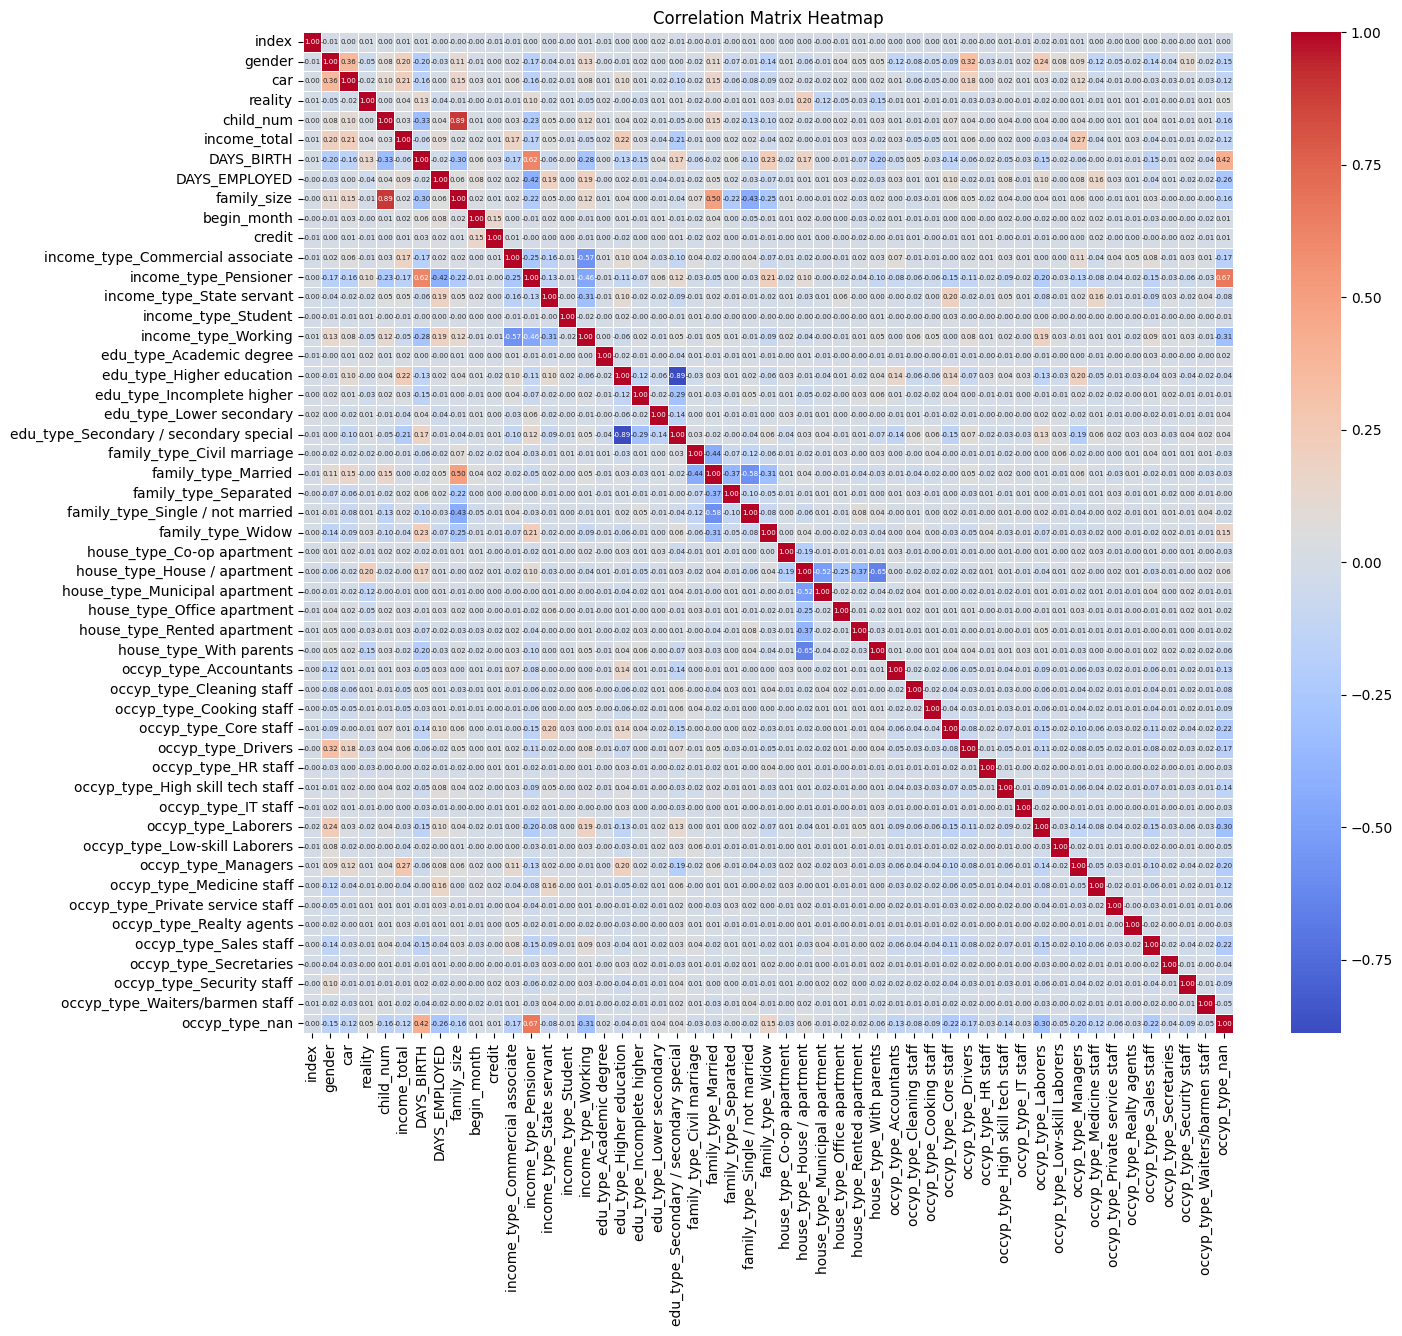

In [ ]:
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_train, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 5}, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

*와 진짜 처참.. 혹시 스케일의 차이 때문에 상관관계가 낮게 나오는걸까*

In [ ]:
onehot_train['credit']

,credit
0,1.0
1,1.0
2,2.0
3,0.0
4,2.0
...,...
26452,1.0
26453,2.0
26454,2.0
26455,2.0


*스피어만 상관계수를 활용해보자*

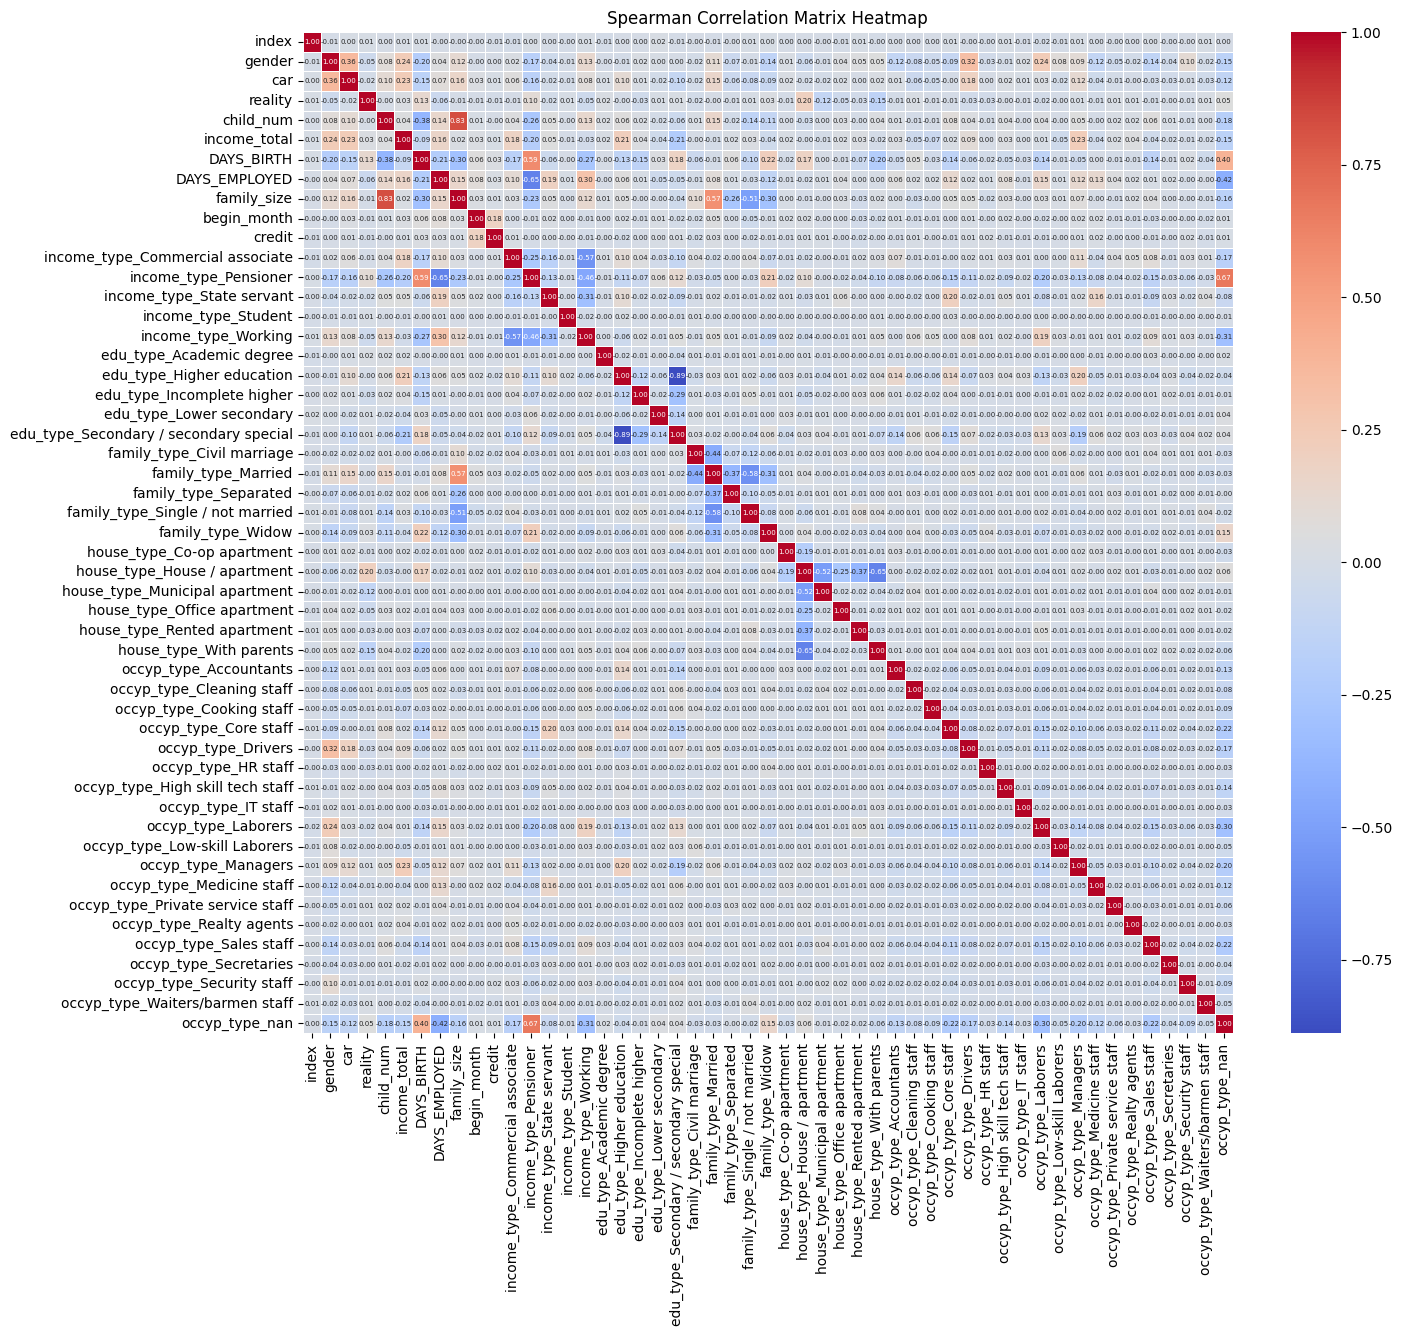

In [ ]:
# 상관관계
correlation_train2 = onehot_train.corr(method='spearman')

plt.figure(figsize=(15, 13))
sns.heatmap(correlation_train2, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 5}, linewidths=0.5)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

*아까보단 나아졌다만 이것도 그냥 그렇다*

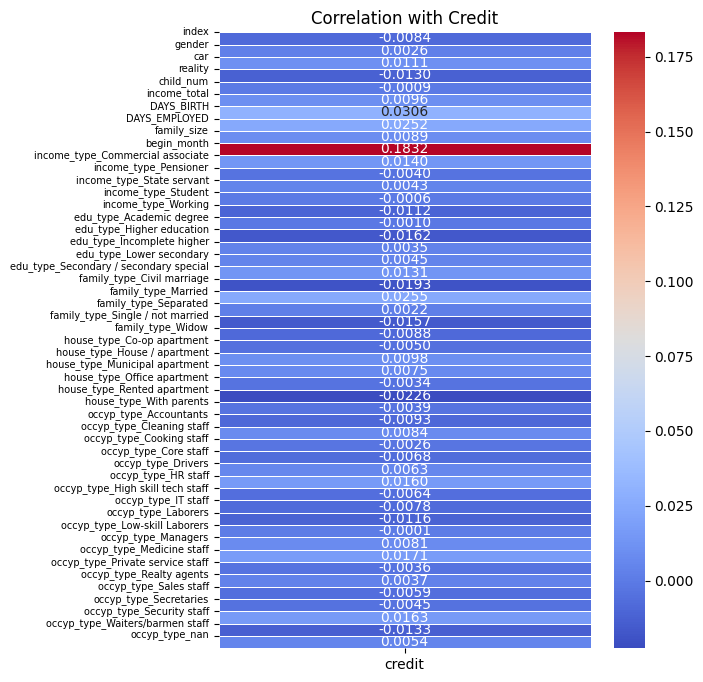

In [ ]:
# 'credit' 컬럼과의 상관관계만
target_corr = onehot_train.corr(method='spearman')[['credit']].drop('credit')

# 직사각형 상관관계 히트맵 시각화
plt.figure(figsize=(6, 8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.yticks(ticks=np.arange(len(target_corr.index)), labels=target_corr.index, fontsize=7)
plt.title('Correlation with Credit')
plt.show()

## 4-2 구간화(보류)

In [ ]:
onehot_train['credit'].unique()

array([1., 2., 0.])

# 5. 모델링

## 5-1. 데이터셋 분할

### 5-1-1 입력값/출력값 분할

In [ ]:
# 모델 학습 입력값
train_x = onehot_train.drop('credit', axis=1)

In [ ]:
# 모델 학습 출력값
train_y = onehot_train['credit']

In [ ]:
test_x = onehot_test # test set에는 원래 'credit' 컬럼이 없어서 따로 drop 해주지 않음

In [ ]:
# 데이터셋 shape 확인
train_x.shape
train_y.shape
test_x.shape

(10000, 50)

### 5-1-2 train set / validaiton set 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, stratify=train_y, test_size=0.25, random_state=10086)

> `stratify=train_y` : train_y의 각 요소별[0,1,2] 비율을 고려하여 train set과 validation set 분할

> `test_size=0.25` : validation set으로 25%, train set으로 75% 사용

> `random_state=10086` : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
* train_test_split는 랜덤으로 데이터를 분리하므로 train_test_split를 설정하지 않으면 수행할 때마다 다른 학습/테스트 데이터 세트가 생성됨
* 어떤 숫자를 적든 그 기능은 같기 때문에 어떤 숫자를 적든 상관없다


* DF 출력값: train_x가 각각 train set, validation set으로 분할

* Series 출력값: train_y가 각각 train set, validation set으로 분할

In [ ]:
# 각각의 set의 shape 확인
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(19842, 50) (6615, 50) (19842,) (6615,)


In [ ]:
# 최종 train set(입력값/출력값), validation set(입력값/출력값) csv 저장
# X_train.to_csv('X_train.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# X_val.to_csv('X_val.csv', index=False)
# y_val.to_csv('y_val.csv', index=False)
test_x.to_csv('X_test.csv', index=False)

## 5-2. 모델 학습

### 5-2-1. 랜덤 포레스트(Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier() # 객체 생성
clf.fit(train_x, train_y) # fit 메서드로 학습 (입력, 출력)

train_proba = clf.predict_proba(train_x) # train_y에 대한 예측 확률 반환 -> train_y가 세개의 요소[0,1,2]로 이루어져있고 각 요소에 대한 그럴듯한 확률 반환

In [ ]:
np.argmax(train_proba, axis = 1)[:10] # row별 가장 높은 값이 존재하는 컬럼을 찾는 것(axis=1) # 10개만 반환
sample_submission.iloc[:,1:] =  clf.predict_proba(test_x) # 전체 행, 1번부터 끝까지의 열에 할당 # test set으로 예측

<ipython-input-200-3a3b582a9e02>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.06 0.28 0.07 ... 0.01 0.13 0.1 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample_submission.iloc[:,1:] =  clf.predict_proba(test_x) # 전체 행, 1번부터 끝까지의 열에 할당 # test set으로 예측
<ipython-input-200-3a3b582a9e02>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.17 0.15 0.3  ... 0.14 0.41 0.32]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample_submission.iloc[:,1:] =  clf.predict_proba(test_x) # 전체 행, 1번부터 끝까지의 열에 할당 # test set으로 예측
<ipython-input-200-3a3b582a9e02>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.77 0.57 0.63 ... 0.85 0.46 0.58]' has dtype incompatible with int64, please explicitly 

In [ ]:
sample_submission
# sample_submission은 대출등급이 아니라 확률!!

,index,0,1,2
0,26457,0.06,0.17,0.77
1,26458,0.28,0.15,0.57
2,26459,0.07,0.30,0.63
3,26460,0.11,0.20,0.69
4,26461,0.11,0.26,0.63
...,...,...,...,...
9995,36452,0.14,0.42,0.44
9996,36453,0.13,0.32,0.55
9997,36454,0.01,0.14,0.85
9998,36455,0.13,0.41,0.46


In [ ]:
# csv 저장
# sample_submission.to_csv('submission_radomforest.csv', index=False)

### 5-2-2. 결정 트리(Decision Tree)


결정 트리 규칙:

|--- begin_month <= 3.50
|   |--- begin_month <= 0.50
|   |   |--- DAYS_BIRTH <= 65.95
|   |   |   |--- class: 1.0
|   |   |--- DAYS_BIRTH >  65.95
|   |   |   |--- class: 0.0
|   |--- begin_month >  0.50
|   |   |--- occyp_type_High skill tech staff <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- occyp_type_High skill tech staff >  0.50
|   |   |   |--- class: 1.0
|--- begin_month >  3.50
|   |--- begin_month <= 4.50
|   |   |--- index <= 997.50
|   |   |   |--- class: 2.0
|   |   |--- index >  997.50
|   |   |   |--- class: 2.0
|   |--- begin_month >  4.50
|   |   |--- begin_month <= 8.50
|   |   |   |--- class: 2.0
|   |   |--- begin_month >  8.50
|   |   |   |--- class: 2.0



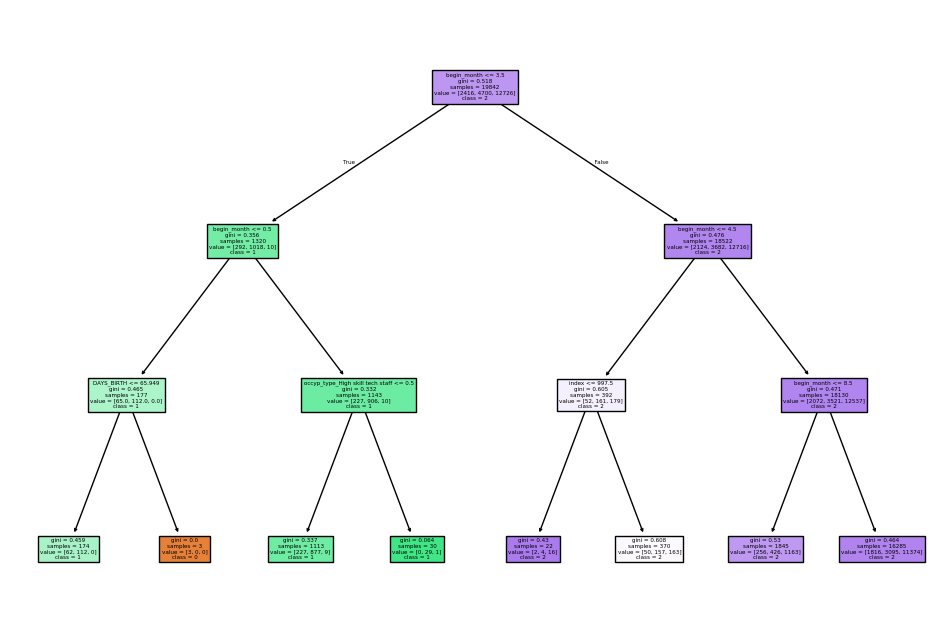

In [ ]:
# 필요한 라이브러리 임포트

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# 2. 결정 트리 모델 생성 및 학습
# max_depth를 설정하여 모델 복잡도 조절 가능
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# 3. 예측 및 평가
y_pred = tree_clf.predict_proba(X_val)
y_val_onehot = pd.get_dummies(y_val) # 원핫 인코딩
logloss = log_loss(y_val_onehot, y_pred)
y_pred.shape

# 4. 결정 트리 시각화 (텍스트)
tree_rules = export_text(tree_clf, feature_names=X_train.columns)
print("\n결정 트리 규칙:\n")
print(tree_rules)

# 5. 결정 트리 시각화 (그래프)
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=X_train.columns, class_names=['0','1','2'], filled=True)
plt.show()

### 5-2-3. XGBoost

In [ ]:
pip install xgboost

logloss: 0.7854


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

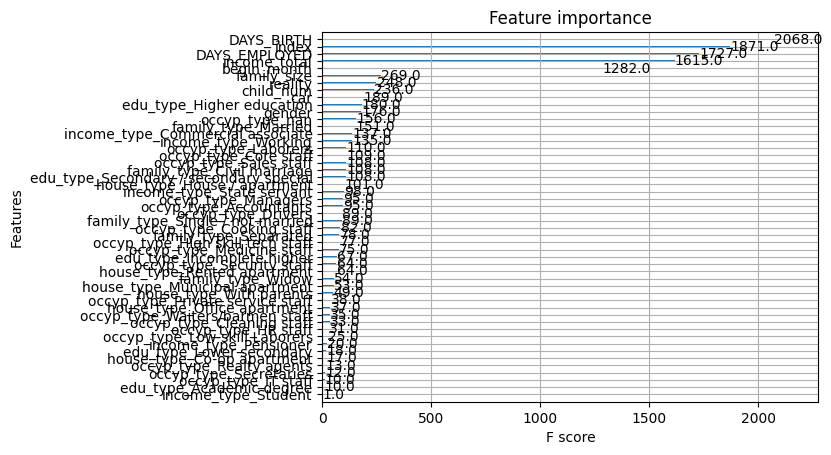

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 로드
# data = load_boston()  # 예제를 위해 Boston Housing 데이터 사용
# X = data.data
# y = data.target

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.25, random_state=42)

# XGBoost 데이터 포맷으로 변환
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# XGBoost 파라미터 설정
params = {
    'objective': 'multi:softprob',
    'num_class': 3,  # 회귀 문제
    'max_depth': 6,                  # 트리의 최대 깊이
    'eta': 0.1,                      # 학습률
    'subsample': 0.8,                # 데이터 샘플링 비율
    'colsample_bytree': 0.8,         # 컬럼 샘플링 비율
    'seed': 42
}

# 모델 학습
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# validation set 예측
y_pred = model.predict(dval)

# 성능 평가
logloss = log_loss(y_val, y_pred)
print(f"logloss: {logloss:.4f}")

# 중요 변수 시각화
xgb.plot_importance(model)


## 5-3. 모델 평가


### 5-3.1 랜덤 포레스트(Rondom Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() # 객체 생성
clf.fit(X_train, y_train) # 모델 학습

y_proba = clf.predict_proba(X_val) # validation set 예측
y_proba

array([[0.03, 0.3 , 0.67],
       [0.05, 0.56, 0.39],
       [0.11, 0.11, 0.78],
       ...,
       [0.11, 0.09, 0.8 ],
       [0.08, 0.13, 0.79],
       [0.06, 0.16, 0.78]])

In [ ]:
y_val # credit 컬럼으로 되어있어 clf.predict_proba(X_val)와 바로 비교가 불가능 -> 원핫 인코딩

,credit
19980,2.0
9136,1.0
14905,2.0
3919,1.0
26239,2.0
...,...
5835,2.0
19240,1.0
5379,2.0
19423,2.0


* 0에 가까울수록 모델의 예측이 정답에 가까운 확률을 제공한다는 뜻
* 0.693 이상: (이진 분류 기준) 모델이 무작위 예측 수준에 머물러 있거나 학습이 제대로 되지 않은 상태일 수 있습니다.

In [ ]:
y_val_onehot = pd.get_dummies(y_val) # 원핫 인코딩

In [ ]:
log_loss(y_val_onehot, y_proba)
# y_val_onehot : 실제 crdeit
# y_proba : validation set에서 credit 예측값

0.7908694397208975

In [ ]:
from sklearn.metrics import log_loss

### 5-3-2. K-Fold cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

# k-Fold 설정
k = 5  # fold의 수
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# 모델 선택
model = RandomForestClassifier(random_state=42)

# 모델 학습
# cross_val_predict로 예측 확률 계산
# method='predict_proba'를 통해 예측 확률 반환
proba_predictions = cross_val_predict(model, train_x, train_y, cv=kf, method='predict_proba')


# 예측 확률을 데이터프레임으로 변환
# df_proba = pd.DataFrame(proba_predictions, columns=[f'Class_{i}' for i in range(proba_predictions.shape[1])])

# 실제 라벨 추가
# df_proba['Actual'] = y

# k-fold Cross-Validation 수행
cv_scores = -cross_val_score(model, train_x, train_y,  cv=kf, scoring='neg_log_loss')

# 결과 출력
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean log loss: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


# sample_submission.iloc[:,1:] = proba_predictions
# sample_submission.to_csv('randomforest_ver2.csv', index=False)

Cross-Validation Scores: [0.77174309 0.78205686 0.77919371 0.77484539 0.78454478]
Mean log loss: 0.7785
Standard Deviation: 0.0047


### 5-3.3. K-fold cross validation(데이콘 강의)

In [ ]:
from sklearn.model_selection import StratifiedKFold # KFold가 아닌 'Stratified'KFold 함수 사용하면 요소 개수를 고려하여 분할해줌

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)

`shuffle=True`

* 데이터를 fold로 나누기 전에 섞을지 여부를 결정
* shuffle=True로 설정하면, 데이터를 랜덤하게 섞은 후 fold를 생성
* 데이터가 정렬되어 있거나 특정 순서로 편향되어 있는 경우 유용

In [ ]:
outcomes = []
sub = np.zeros((test_x.shape[0],3))
for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)): # train_x, train_y를 5개로 분할하면서 각각의 index 반환
  KX_train, KX_val = train_x.iloc[train_index], train_x.iloc[val_index] # train set으로 분할된 index들만 뽑아서 X_train, y_train 변수 할당
  Ky_train, Ky_val = train_y.iloc[train_index], train_y.iloc[val_index] # validation set으로 분할된 index들만 뽑아서 X_val, y_val 변수 할당
  from sklearn.ensemble import RandomForestClassifier
  clf = RandomForestClassifier() # 객체 생성
  clf.fit(KX_train, Ky_train) # 모델 학습
  predictions = clf.predict_proba(KX_val) # validation set 예측

  Ky_val_onehot = pd.get_dummies(Ky_val) # y_val one-hot encoding

  sub += clf.predict_proba(test_x) # test_x의 예측값이 요소별로 더해짐
  logloss = log_loss(Ky_val_onehot, predictions) # log_loss 계산

  outcomes.append(logloss) # log_loss 결과 저장

sub = sub/5 # 각 fold별 추론값의 평균
np.mean(outcomes) # log_loss 평균

# train_index: 학습에 사용되는 80%의 index
# val_index: 검증에 사용되는 20%의 index

# n_fold, () in enumerate()를 사용해서 몇 번째 fold인지 확인할 수 있음

0.7672707435580712

이렇게 하면 train set이 바뀌는 거 아닝가..? 각각의 fold로 학습시키고, 각 fold 학습에 따른 test set 예측 결과의 평균?
* 확인 결과 train set바뀌어도 된댄다

In [ ]:
# 각 fold별 예측값의 평균
sub

array([[0.076, 0.204, 0.72 ],
       [0.326, 0.124, 0.55 ],
       [0.062, 0.282, 0.656],
       ...,
       [0.042, 0.136, 0.822],
       [0.128, 0.396, 0.476],
       [0.152, 0.308, 0.54 ]])

In [ ]:
sample_submission.iloc[:,1:] = sub

In [ ]:
sample_submission.to_csv('5fold_ver5.csv', index=False)

## 5-4 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import joblib  # 모델 저장용 라이브러리

# 모델 초기화
rf = RandomForestClassifier()

# 하이퍼파라미터 범위 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_log_loss')

# GridSearch 수행
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 테스트 데이터로 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict_proba(X_val)
print("log loss score:", log_loss(y_val, y_pred))



# 모델 저장
model_filename = 'best_randomforest_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved to {model_filename}")

# 모델 로드
loaded_model = joblib.load('best_randomforest_model.pkl')
print("Model loaded successfully.")

# 로드한 모델로 테스트 데이터 예측
loaded_y_pred_rf = loaded_model.predict_proba(test_x)

log loss score: 0.7380467533032729


In [ ]:
# 제출 파일 저장
sample_submission.iloc[:,1:] = loaded_y_pred_rf
sample_submission.to_csv('best_raddomforest_model_ver2.csv', index=False)